In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from skimage.transform import hough_line, hough_line_peaks
from sklearn.preprocessing import StandardScaler
from scipy.signal import butter, filtfilt


# Section 1

1. How many unique restaurants could be found in this data set? (Hint: Use the [Business_ID] column for this evaluation.) 

In [2]:
yelp = pd.read_csv('Section 1 data.csv')

In [3]:
yelp['Business_ID'].isna().sum() #checking NAN values

0

In [4]:
unique_res = yelp['Business_ID'].nunique()

print(f'{unique_res} restaurants could be found in this dataset.')

30276 restaurants could be found in this dataset.


2.Which restaurant received the highest number of reviews? What about percentage-wise?

In [5]:
high_res = yelp.groupby('Business_Name')['Review_Text'].count().sort_values(ascending = False)

In [6]:
print(high_res)

Business_Name
Hash House A Go Go                      962
Mon Ami Gabi                            856
Earl of Sandwich                        768
Wicked Spoon                            656
The Buffet                              605
                                       ... 
North Scottsdale Pediatric Dentistry      1
North Show Terrace                        1
North Valley Appliance Service LLC        1
North Valley Dermatology                  1
#1 Brothers Pizza                         1
Name: Review_Text, Length: 22676, dtype: int64


In [7]:
per_res = high_res/sum(high_res)*100

In [8]:
print(per_res)

Business_Name
Hash House A Go Go                      0.422708
Mon Ami Gabi                            0.376131
Earl of Sandwich                        0.337464
Wicked Spoon                            0.288250
The Buffet                              0.265841
                                          ...   
North Scottsdale Pediatric Dentistry    0.000439
North Show Terrace                      0.000439
North Valley Appliance Service LLC      0.000439
North Valley Dermatology                0.000439
#1 Brothers Pizza                       0.000439
Name: Review_Text, Length: 22676, dtype: float64


In [9]:
print(f'Hash House A Go Go received the highest number of reviews with {high_res[0]} texts and {per_res[0]}%.')

Hash House A Go Go received the highest number of reviews with 962 texts and 0.42270849811055455%.


3.	Which cities have got at least one 5-star review in Nevada (NV) state?

In [10]:
yelp_nv = yelp.query('State  == "NV" & Avg_Business_Star_Rating >= 5')['City'].unique()

In [11]:
print(f'{yelp_nv} have got at least one 5-star review in NV.')

['Las Vegas' 'Henderson' 'Boulder City' 'Nellis'] have got at least one 5-star review in NV.


4.	Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?  

In [12]:
high_cit = yelp[yelp['Business_Category'] == 'Hotels & Travel'].groupby('City')['Review_Text'].count().sort_values(ascending=False)


In [13]:
print(high_cit)

City
Las Vegas            10245
Phoenix               1188
Scottsdale             633
Henderson              202
Tempe                  177
Edinburgh              174
Madison                165
Mesa                    99
Chandler                74
Glendale                34
Paradise Valley         32
Middleton               19
Surprise                14
Goldfield               14
Peoria                  13
Goodyear                12
Laveen                  10
Casa Grande              9
Gilbert                  8
Fountain Hills           7
Cambridge                7
Wickenburg               7
Gila Bend                6
Enterprise               6
Waterloo                 5
Kitchener                4
Avondale                 4
Anthem                   4
Verona                   3
South Queensferry        2
Tolleson                 2
Inverkeithing            2
Apache Junction          2
Florence                 2
Coolidge                 2
Buckeye                  2
Mc Farland             

In [14]:
per_cit = high_cit/sum(high_cit)*100
print(per_cit[0])

77.64304660856385


In [15]:
print(f' Las Vegas has the highest review in Hotel and Travel Business Category with {high_cit[0]} reviews and {per_cit[0]}%.')

 Las Vegas has the highest review in Hotel and Travel Business Category with 10245 reviews and 77.64304660856385%.


5.	At what day of the week people are more likely to post their reviews? 

In [16]:
yelp.dtypes #Checking type of date.

Review_Date                  object
Review_Text                  object
User_ID                      object
Business_ID                  object
Business_Name                object
Business_Category            object
City                         object
State                        object
Latitude                    float64
Longitude                   float64
Avg_Business_Star_Rating    float64
dtype: object

In [17]:
yelp['Review_Date'] = pd.to_datetime(yelp['Review_Date']) # changing data types

In [18]:
yelp['day_of_week'] = yelp['Review_Date'].dt.day_name() # creating new column based on the day of week

In [19]:
yelp.groupby('day_of_week')['Review_Text'].count().sort_values(ascending=False)

day_of_week
Monday       36445
Tuesday      34262
Wednesday    34170
Sunday       32889
Thursday     30669
Friday       29574
Saturday     29571
Name: Review_Text, dtype: int64

In [20]:
print('Most of people choose to give review on Monday.')

Most of people choose to give review on Monday.


6.	Showcase if there are any trends regarding restaurant performance as time goes by.

In [21]:
time = yelp.groupby(yelp['Review_Date'].dt.year)['Review_Text'].count()

<Axes: xlabel='Review_Date', ylabel='Review_Text'>

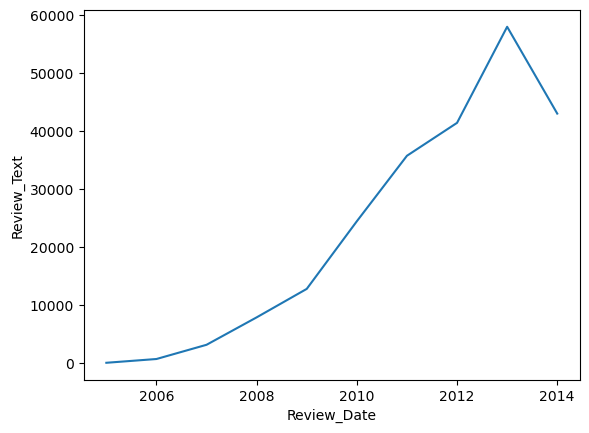

In [22]:
sns.lineplot(time)

Until 2013th year, the number of reviews are increasing, in the 2013 people tend to make more reviews. 

In [23]:
avg_star = yelp.groupby(yelp['Review_Date'].dt.year)['Avg_Business_Star_Rating'].mean()

<Axes: xlabel='Review_Date', ylabel='Avg_Business_Star_Rating'>

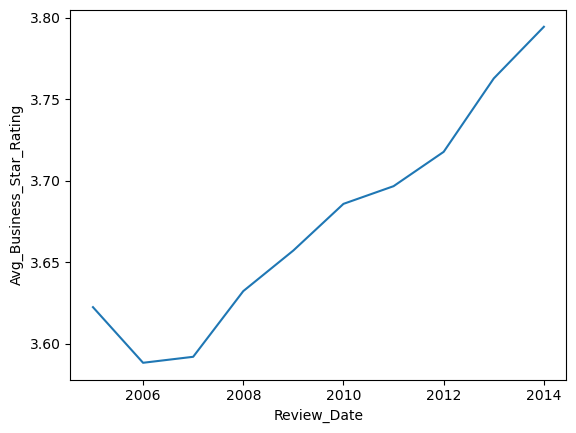

In [24]:
sns.lineplot(avg_star)

People tend to give more than 3.5 star and tend to increase rating over the period.

In [25]:
state = yelp.groupby('State')['Avg_Business_Star_Rating'].mean()

<Axes: xlabel='State'>

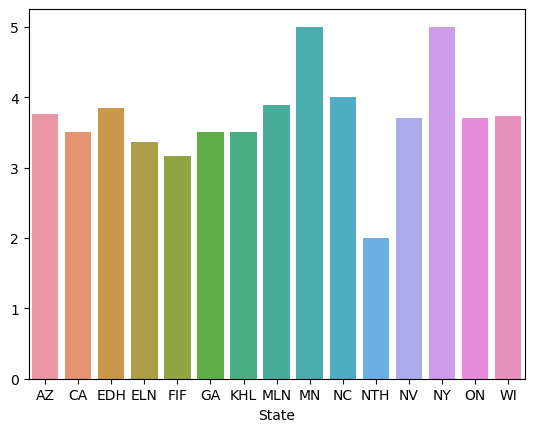

In [26]:
sns.barplot(x = state.index, y = state.values)

MN and NY are the most rating states. However NTH has least rating states

In [27]:
star_5 = yelp[yelp['Avg_Business_Star_Rating'] >=5] #high ranking values

In [28]:
high_5 = star_5.groupby('Business_Category')['Review_Text'].count().sort_values(ascending = False).head() #a lot of reviews within high ranking categories

<Axes: xlabel='Business_Category'>

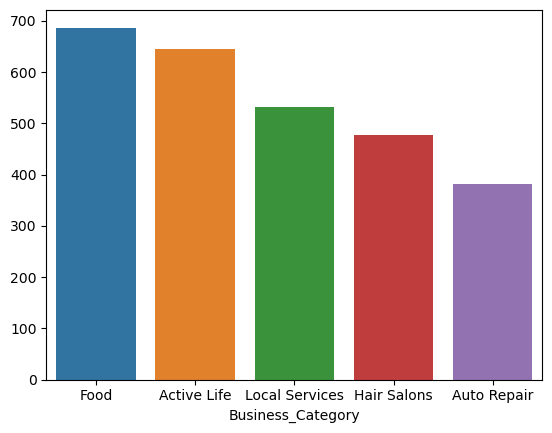

In [29]:
sns.barplot(x = high_5.index, y = high_5.values)

In [30]:
high_bus = yelp.groupby('Business_Category')['Review_Text'].count().sort_values(ascending = False).head()

<Axes: xlabel='Business_Category'>

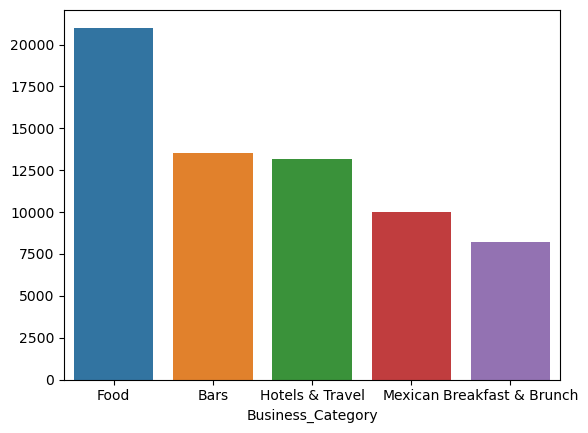

In [31]:
sns.barplot(x = high_bus.index, y = high_bus.values)

A lot of reviews are given for food sectors. 

We can see that food sector has both high ratings and a lot of reviews.

7.	Based on analyzed data showcase if there are any steps that the restaurant can take to improve their public appeal.   

Given that MN and NY are already exhibiting robust performance, restaurants in these states ought to leverage this by putting a lot of emphasis on good reviews on their websites and social media, Encouraging even more good comments by rewarding customers who post evaluations with loyalty programs or discounts, partnering with regional food bloggers or influencers in these states with good ratings to help advance their reputation.


In states with lower ratings, like North Dakota (NTH), eateries ought to get detailed consumer comments to find out why the ratings are so low, comment cards and surveys have their uses and based on the input received, enhance the eating experience, menu options, and customer service.


Encourage more online reviews by providing incentives for customers to submit feedback, as we have noticed a significant volume of reviews in the food industry. Marketing campaigns like "Write a review and receive a free dessert" can improve visibility and customer happiness.

8.	Bonus Question – Based on this data set which user had the highest cumulative travel distance? What distance has been covered by him/her?


The overall "travel distance" of a person who reviews many establishments is the sum of the distances between the businesses they have rated.

In [32]:
from geopy.distance import geodesic

In [33]:
yelp_sorted = yelp.sort_values(by = ['User_ID', 'Review_Date'])

In [34]:
def calculate_cumulative_distance(data):
    cumulative_distance = 0.0
    
    for i in range(1, len(data)):
        coords_1 = (data.iloc[i-1]['Latitude'], data.iloc[i-1]['Longitude'])
        coords_2 = (data.iloc[i]['Latitude'], data.iloc[i]['Longitude'])
        cumulative_distance += geodesic(coords_1, coords_2).kilometers
        
        return cumulative_distance

In [35]:
user_distance = yelp_sorted.groupby('User_ID').apply(calculate_cumulative_distance).reset_index(name = 'total_distance_km')

In [36]:
max_distance_user = user_distance.loc[user_distance['total_distance_km'].idxmax()]

In [37]:
print(f"The user with the highest travel distance is User ID {max_distance_user['User_ID']}, with a total distance of {max_distance_user['total_distance_km']} km.")

The user with the highest travel distance is User ID AtEYAeRoJ_6YKMMour2wVw, with a total distance of 8083.112806808389 km.


# Section 2
## Part 1

In [38]:
def clock_matrix(N):
    matrix = np.zeros((N,N), dtype = int)
    
    center = N // 2
    
    x, y = center, center
    
    num = 1
    matrix[x,y] = num
    
    #variables to control the spiral movement
    direction = 0 #0 = right, 1 = down, 2 = left, 3 = up
    step = 1 #number of steps we take in one direction
    max_num = N * N #max number to fill
    
    while num < max_num:
        #two iterations: one for moving in a direction and one for turning
        for _  in range(2): #change direction every 2 moves
            dx, dy = [(0,1),(1,0),(0,-1),(-1, 0)][direction] #direction movement: right, down, left, up
            for _ in range(step):
                #move to the next cell in the current direction
                x += dx
                y += dy
                num += 1
                if num > max_num:
                    break
                matrix[x,y] = num
            direction = (direction+1) %4 #rotate the direction 
       #increase the number steps after each full layer(right+down or left+up)     
        step += 1
        
    return matrix
        

In [39]:
N = 5
spiral_matrix = clock_matrix(N)

In [40]:
print(spiral_matrix)

[[21 22 23 24 25]
 [20  7  8  9 10]
 [19  6  1  2 11]
 [18  5  4  3 12]
 [17 16 15 14 13]]


## Part 2


primary diagonal = matrix[i][i] where the row index equals the column index
secondary = the row index plus the column index equals N-1

In [41]:
def sum_diagonals(matrix):
    N = len(matrix)
    
    primary = 0
    secondary = 0 
    
    for i in range(N):
        primary += matrix[i][i]
        secondary += matrix[i][N-1-i]
        
    return primary, secondary

In [42]:
primary_sum, secondary_sum = sum_diagonals(spiral_matrix)

In [43]:
print(f'Primary Diagonal Sum: {primary_sum}')
print(f'Secondary Diagonal Sum: {secondary_sum}')

Primary Diagonal Sum: 45
Secondary Diagonal Sum: 57


# Section 3

In [44]:
das = pd.read_csv('Section 3 data.csv')

In [45]:
das.head()

,3.356726646,3.4246883392333984,3.315129280090332,2.866584539413452,3.2591633796691895,3.063363790512085,3.02205228805542,3.709723949432373,3.0598325729370117,2.890528678894043,...,3.2995495796203613,3.197462558746338,3.1719608306884766,3.526296615600586,3.013812303543091,3.373962879180908,3.448312759399414,3.622835636138916,3.211477041244507,3.4222567081451416
0,3.264011,3.331538,3.254502,2.816155,3.175651,2.995944,2.963060,3.618391,3.015709,2.849339,...,3.220985,3.110368,3.108212,3.489397,2.960912,3.306820,3.417709,3.524081,3.141618,3.361223
1,3.170393,3.238018,3.185075,2.759907,3.089149,2.929650,2.906405,3.522798,2.967472,2.804227,...,3.139422,3.024213,3.043078,3.437473,2.904058,3.234052,3.370602,3.421170,3.069848,3.288135
2,3.073419,3.143099,3.082911,2.682017,2.991492,2.867536,2.858474,3.411356,2.903908,2.744555,...,3.046735,2.941585,2.972789,3.329692,2.832499,3.140333,3.262105,3.302803,2.990968,3.170215
3,2.976448,3.048187,2.980743,2.604133,2.893835,2.805416,2.810538,3.299923,2.840350,2.684883,...,2.954042,2.858966,2.902495,3.221916,2.760934,3.046621,3.153600,3.184436,2.912082,3.052295
4,2.879478,2.953276,2.878582,2.526245,2.796179,2.743304,2.762607,3.188490,2.776787,2.625209,...,2.861355,2.776344,2.832206,3.114133,2.689374,2.952907,3.045095,3.066068,2.833202,2.934375


 * Brief description of Distributed Acoustic Sensing (DAS) working principle and cases of its applications.

A measurement method called Distributed Acoustic Sensing (DAS) uses fiber-optic cables as a strain or strain-rate sensor along the cable. Fibre optic cables, originally developed for communication, are used as vibration sensors along the length of the pipeline to pinpoint the precise locations of leaks or threats to the pipeline integrity in real-time. The DAS, connected to one end of the fibre, uses a laser to send thousands of short pulses of light along the fibre every second. A small proportion of the loght travelling along the fibre is reflected back the process known as Rayleigh Backscatter. Vibrations from the surronding environment will disturb the backscatter at that point in the fibre and will therefore be observed by the DAS interrogator. 

Fiber-optic cables are widely used. Because of this, there are a lot of interesting and unconventional uses for it. The ETH Zürich recently began tracking the seismic sequence and possible eruption at Grindavik, Iceland, in cooperation with the Icelandic Met office IMO and HS Orca. Glacier seismology is another excellent application for fiber-optic cables. They can dissolve into the ice and couple to it! Studies from Antarctica (Hudson et al., 2021) and Greenland (Fichtner et al., 2023) serve as examples. The use of subsea cables to follow and locate various whales based on their songs collected with DAS is another fascinating application (Rørstadbotnen et al., 2023). 

* Do data observations: some statistical analysis to get to know your data as well as various types of visualizations and insights from them 

In [46]:
das.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   3.356726646         4653 non-null   float64
 1   3.4246883392333984  4653 non-null   float64
 2   3.315129280090332   4653 non-null   float64
 3   2.866584539413452   4653 non-null   float64
 4   3.2591633796691895  4653 non-null   float64
 5   3.063363790512085   4653 non-null   float64
 6   3.02205228805542    4653 non-null   float64
 7   3.709723949432373   4653 non-null   float64
 8   3.0598325729370117  4653 non-null   float64
 9   2.890528678894043   4653 non-null   float64
 10  3.089564323425293   4653 non-null   float64
 11  3.1584572792053223  4653 non-null   float64
 12  3.138185501098633   4653 non-null   float64
 13  3.3592889308929443  4653 non-null   float64
 14  3.1369755268096924  4653 non-null   float64
 15  3.361456871032715   4653 non-null   float64
 16  3.2111

In [47]:
# Descriptive statistics
das.describe()

,3.356726646,3.4246883392333984,3.315129280090332,2.866584539413452,3.2591633796691895,3.063363790512085,3.02205228805542,3.709723949432373,3.0598325729370117,2.890528678894043,...,3.2995495796203613,3.197462558746338,3.1719608306884766,3.526296615600586,3.013812303543091,3.373962879180908,3.448312759399414,3.622835636138916,3.211477041244507,3.4222567081451416
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,...,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,4.752868,4.747885,4.829078,4.897856,4.950687,4.636541,4.686629,4.816176,4.563740,4.609075,...,4.858223,5.031630,4.771273,4.782622,4.844559,4.657977,4.695436,4.765666,4.817903,4.684409
std,6.090655,6.087824,6.235408,6.312660,7.158552,5.529075,5.977091,7.142968,5.366797,5.395040,...,6.198837,7.506829,5.899376,5.691797,6.242591,5.510348,5.348646,5.934935,6.431366,5.816387
min,0.544619,0.560788,0.552840,0.505436,0.530923,0.565210,0.588241,0.549183,0.592048,0.523508,...,0.524439,0.554485,0.581016,0.482178,0.543876,0.455419,0.528574,0.507065,0.579684,0.516037
25%,1.385173,1.342741,1.414165,1.398196,1.404133,1.399881,1.351882,1.279366,1.352066,1.263204,...,1.396708,1.453254,1.482301,1.471598,1.467277,1.443125,1.460243,1.424252,1.484492,1.400726
50%,2.402526,2.351952,2.432117,2.381935,2.362599,2.466529,2.261786,2.145211,2.337082,2.316049,...,2.572299,2.451007,2.537028,2.566216,2.549755,2.436221,2.569362,2.495766,2.640467,2.547637
75%,5.200344,5.236828,5.148625,5.367506,5.336435,5.504987,5.396548,5.361143,5.593193,5.777591,...,5.207477,5.499607,5.548147,5.589947,5.589694,5.531091,5.752094,5.920429,5.699529,5.355574
max,70.807121,55.407410,47.104305,48.785011,80.458168,45.803200,50.664410,78.219696,45.119656,40.276398,...,51.160069,87.792076,64.128075,42.107475,69.806725,41.938885,39.580841,53.038849,81.971535,62.708450


The columns' average values are about 4-5, indicating that most observations fall within this range on average. With some columns showing a standard deviation as high as 7.15 (indicating a broad variety of values), the values vary greatly. This implies that some columns are highly variable, most likely pointing to outliers or wider ranges at particular depths or time intervals.While the greatest values might rise to 80.45, the minimum values are always low (around 0.5). Significant outliers are present, as seen by this wide range. The greatest value in column 3.197462558746338, for instance, is 87.79, but the majority of values (as shown by the quartiles) are somewhat less, indicating the prevalence of extremely high values (outliers). To conclude, outliers are present and the data exhibits a broad spread, particularly in the upper ranges.
To check in detail, we should look at visaulisations. 



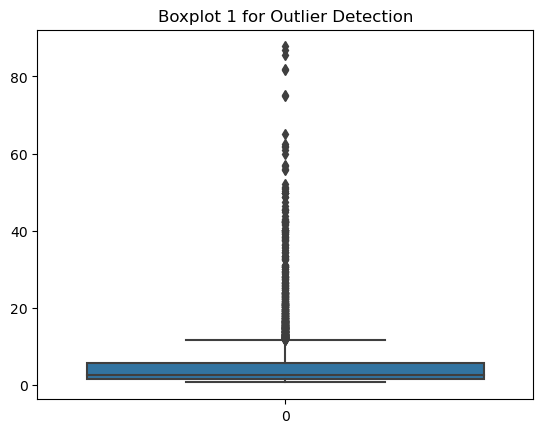

In [48]:
sns.boxplot(data=das['3.197462558746338'])
plt.title('Boxplot 1 for Outlier Detection')
plt.show()

Several important features of the dataset are visible when we look at this boxplot made for outlier detection. The median line is near zero, and the major distribution of the data, represented by the blue box (interquartile range), is rather tight and centred between 0 and 5 units. A reasonably steady baseline in the measurements is shown by this close clustering of the core data. But what's most remarkable about this distribution is the large number of outliers, which are shown as black dots and range upward from about 30 units to 85 units. A dense collection of these outliers appears to form between 30 and 50 units, followed by another group between 55 and 65 units, and a few extreme points around 80 and 85 units. Although the majority of the values cluster close to zero, the distribution shows strong right-skewed characteristics, meaning that there are notable positive deviations from this baseline. A number of phenomena could be represented by these outliers: measurement errors that need data cleaning, real but odd system events that require examination, or notable anomalies that demand extra care. Given this distribution pattern, strong statistical methodologies should be used for any research; traditional statistical methods presuming normalcy would be inadequate. These outliers may point to significant occurrences or system circumstances that call for observation or control measures if they are accurate measurements. The sharp contrast between the many outliers and the compact main distribution indicates that this system occasionally deviates significantly from its typical condition, which may be important for comprehending and controlling the underlying process.


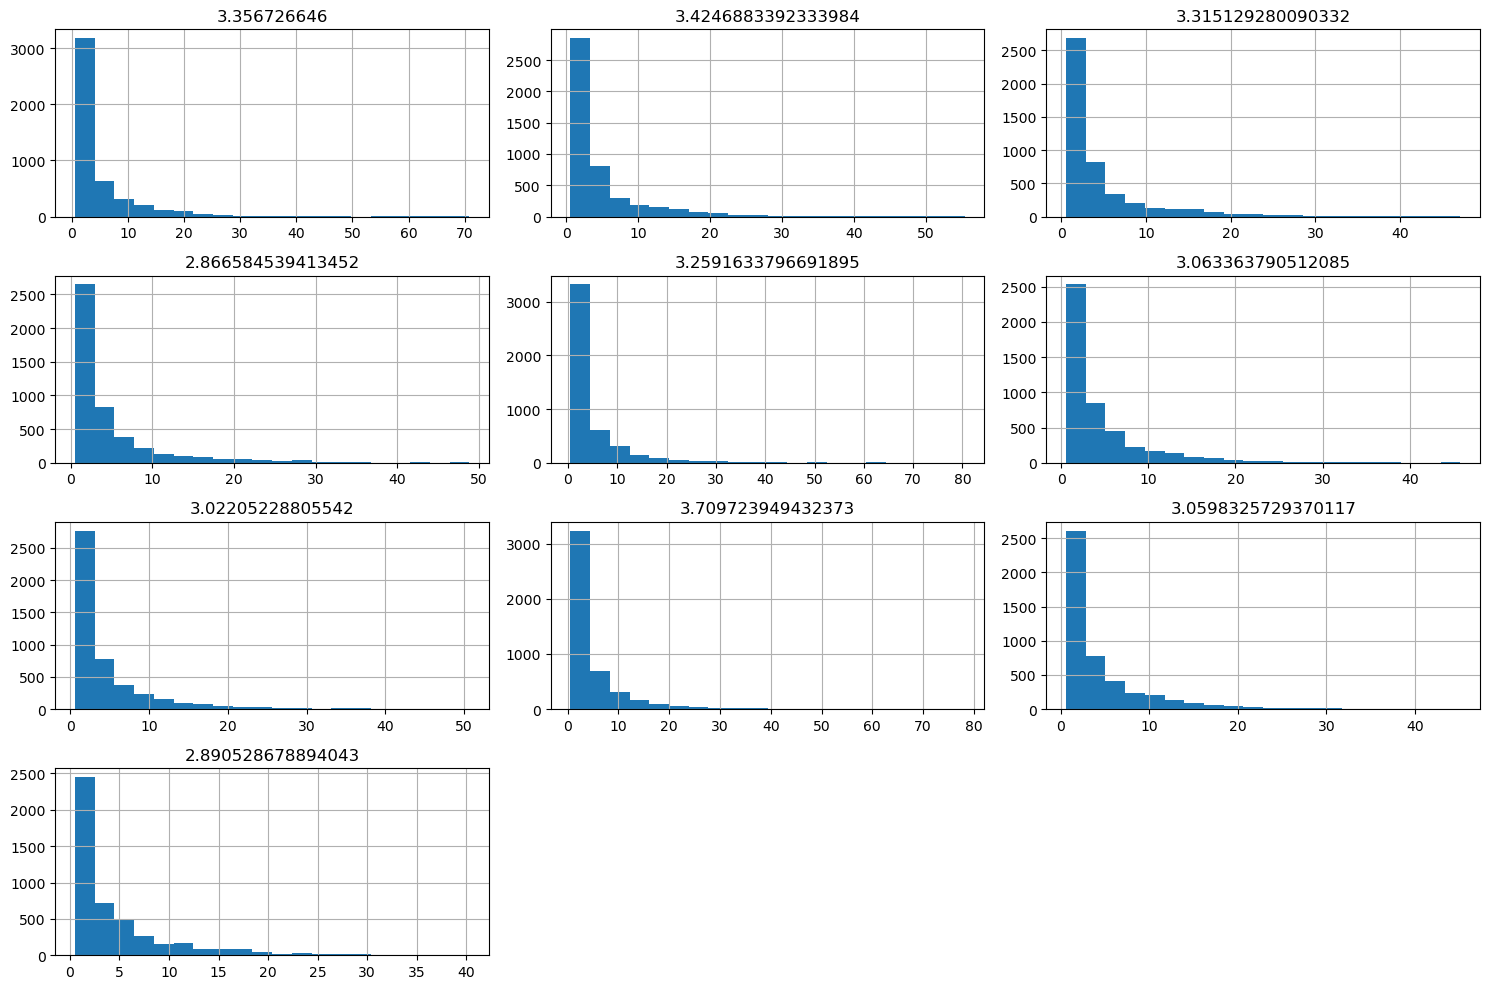

In [49]:
# Plot histograms for the first 10 columns
das.iloc[:, :10].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

Every histogram shows a distribution that is heavily skewed to the right, with a long tail that extends to higher values and the majority of values clustered close to zero. Each plot's peak frequency usually falls between 2500 and 3000 counts in the lowest bin, indicating that the majority of samples show comparatively little acoustic activity or signal strength. Although these distributions have very low frequencies (usually less than 500 counts), their tails vary in length, with some reaching up to values of 70–80 units. The figures above each plot, which roughly range from 2.86 to 3.70, most likely show statistical metrics for the distribution of each column, such as means or standard deviations. Instead of being a random variation, the shape consistency across all histograms suggests that this is a distinctive pattern of the sensing device or the thing being seen. This kind of distribution is common in acoustic sensing applications, where a large number of low-magnitude readings are produced by background noise or normal conditions, while greater magnitude values are produced by less frequent occurrences or signals of interest. 

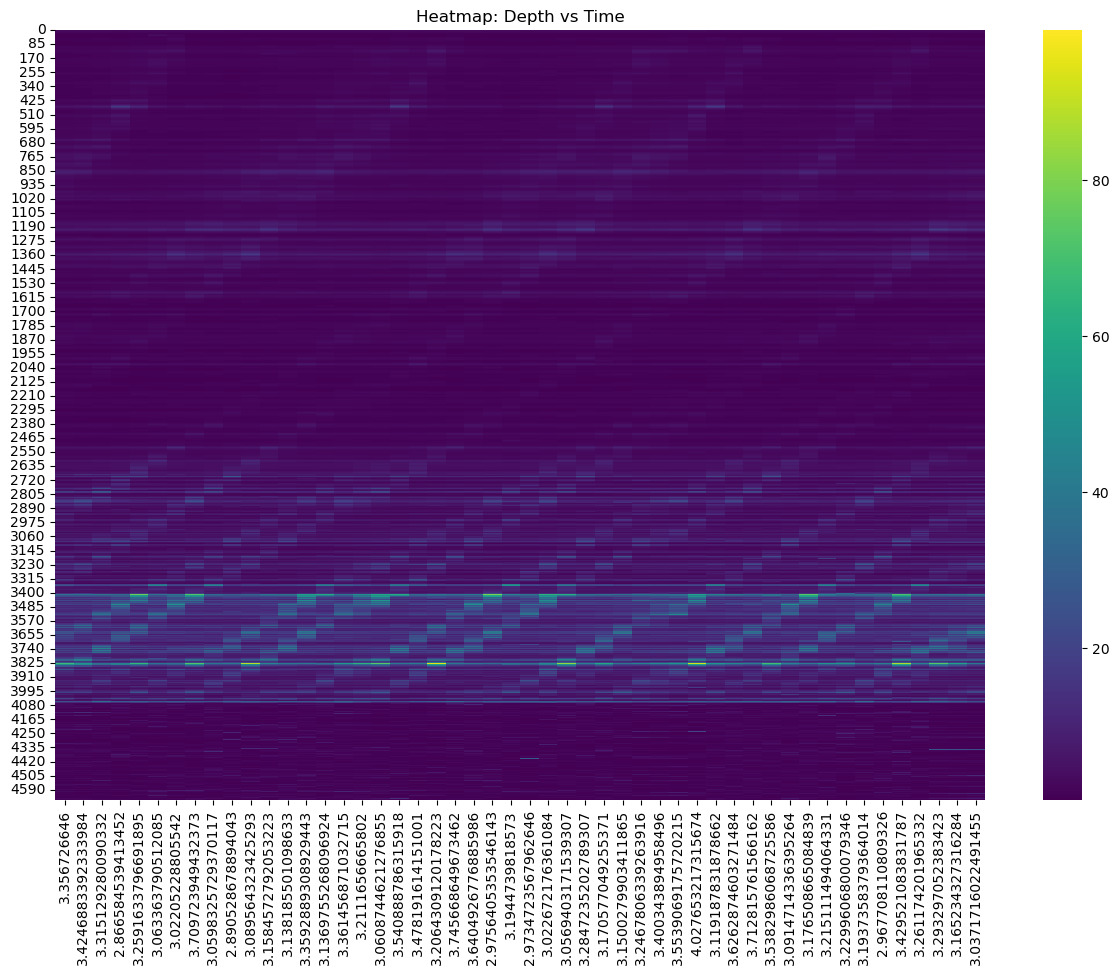

In [50]:
# Heatmap to visualize how values change over depth and time
plt.figure(figsize=(15, 10))
sns.heatmap(das.iloc[:, :50], cmap='viridis', cbar=True)
plt.title('Heatmap: Depth vs Time')
plt.show()

Several important findings are revealed by the heatmap visualisation of depth versus time data: While clear patterns of higher activity are seen, mostly in the lower third of the depth range, the remainder of the plot is dark purple, indicating relatively low values throughout most depths and durations. Significant activity is observed at depths of 3400–4000 meters, with a distinct banding pattern that displays recurring rises in values. Conversely, there is minimal fluctuation and persistently low levels at the higher depths (0–2500 meters). Particularly in the 3400–4000 metre range, the x-axis progression shows a cyclical pattern in the active regions, indicating frequent fluctuations in the observations or recurrent events.The majority of high-intensity regions only extend into the blue-green range (about 40–60), with peak intensities being comparatively uncommon and localised, according to the colour scale, which goes from 0 (purple) to about 80–100 (yellow).

* Implement at least one algorithm (coding in Python, MATLAB, etc.) for line detection in the given signal using spatiotemporal data. Implementation of additional algorithm and its comparison with the first one is highly welcomed

For line detection in this algorithm, Haugh Transform and Gradient-Based method were applied. 

Using a voting process in parameter space, the Hough Transform is a feature extraction method that may identify objects with imperfections. When applied to lines, it reduces a challenging global detection problem in image space to a local peak detection problem in parameter space that is simpler to solve.



In [51]:
class DASLineDetector:
    def __init__(self, data):
        """
        Initialize the DAS Line Detector 
        
        Parameters:
        data(np.array): 2D array where rows represent depth and columns represent time
        """
        self.data = data
        self.preprocessed_data = None
        
    def preprocess_data(self):
        """Preprocess the DAS data"""
        # Standardize the data
        scaler = StandardScaler()
        self.preprocessed_data = scaler.fit_transform(self.data)
        
        # Apply median filter to reduce noise
        self.preprocessed_data = ndimage.median_filter(self.preprocessed_data, size = 3)
        
        return self.preprocessed_data
    
    def hough_transform_detection(self, threshold = 0.5):
        """
        Detect lines using Hough Transform
        
        Parameters:
        threshold (float): Threshold for line detection (0-1)
        
        Returns:
        tuple: (angles, distances, strengths) of detected lines
        """
        
        if self.preprocessed_data is None:
            self.preprocess_data()
        
        # Edge Detection
        edges = np.gradient(self.preprocessed_data)[0]
        edges = np.abs(edges) > np.percentile(np.abs(edges), 90)
        
        # Performing Hough Transform
        tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
        h, theta, d = hough_line(edges, theta = tested_angles)
        
        # Peaks in Hough space
        peaks = hough_line_peaks(h, theta, d,
                                threshold = threshold * np.max(h),
                                min_distance = 20,
                                 min_angle = 10)
        return peaks
    
    def gradient_based_detection(self, window_size = 5, threshold=0.7):
        """
        Detect lines using gradient-based method
        
        Parameters: 
        window_size (int)L Size of sliding window
        threshold (float): Threshold for line detection (0-1)
        
        Returns:
        list: List of detected line segments (start_point, end_point, strength)"""
        
        if self.preprocessed_data is None:
            self.preprocess_data()
            
        # Calculate spatial and temporal gradients
        spatial_grad = ndimage.sobel(self.preprocessed_data, axis = 0)
        temporal_grad = ndimage.sobel(self.preprocessed_data, axis = 1)
        
        # Calculate gradient magnitude and direction
        magnitude = np.sqrt(spatial_grad**2 +temporal_grad**2)
        direction = np.arctan2(temporal_grad, spatial_grad)
        
        # Strong gradients
        strong_gradients = magnitude > (threshold * np.max(magnitude))
        
        #Detect line segments using sliding window
        lines = []
        for i in range(0, self.preprocessed_data.shape[0] - window_size):
            for j in range(0, self.preprocessed_data.shape[1] - window_size):
                window = strong_gradients[i:i+window_size, j:j+window_size]
                if np.sum(window)> (window_size ** 2 * 0.5):
                    avg_direction = np.mean(direction[i:i+window_size, j:J+window_size][window])
                    strength = np.mean(magnitude[i:i+window_size, j:j+window_size][window])
                    lines.append(((i,j), (i+window_size, j+window_size),strength, avg_direction))
                    
        return lines
    
    
    def visualise_results(self, hough_results = None, gradient_results = None):
        """
        Visualise the detection results
        
        Prameters:
        hough_results: Results from Hough Transform detection
        gradient_results: Results from gradient-based detection
        """
        fig, axes = plt.subplots(1, 3, figsize = (15, 5))
        
        # Original data
        axes[0].imshow(self.data, aspect='auto', cmap = 'viridis')
        axes[0].set_title('Original DAS Data')
        axes[0].set_xlabel('TIme (minutes)')
        axes[0].set_ylabel('Depth(m)')
        
        # Hough Results
        if hough_results is not None:
            angles, distances, strengths = hough_results
            axes[1].imshow(self.data, aspect='auto', cmap='viridis')
            for angle, dist, strength in zip(angles, distances, strengths):
                y0 = dist * np.cos(angle)
                y1 = y0 + self.data.shape[1] * np.sin(angle)
                x0 = dist * np.sin(angle)
                x1 = x0 + self.data.shape[1] * np.cos(angle)
                axes[1].plot((x0, x1), (y0, y1), '-r', alpha=0.7)
            axes[1].set_title('Hough Transform Detection')
            axes[1].set_xlabel('Time (minutes)')
          
        # Gradient-based results
        if gradient_results is not None:
            axes[2].imshow(self.data, aspect='auto', cmap='viridis')
            for start, end, strength, direction in gradient_results:
                axes[2].plot([start[1], end[1]], [start[0], end[0]], '-g', alpha=0.3)
            axes[2].set_title('Gradient-based Detection')
            axes[2].set_xlabel('Time (minutes)')
            
        plt.tight_layout()
        plt.show()
            

In [52]:
detector = DASLineDetector(das)

In [53]:
hough_results = detector.hough_transform_detection(threshold = 0.4)


In [54]:
gradient_results = detector.gradient_based_detection(window_size = 7, threshold = 0.6)

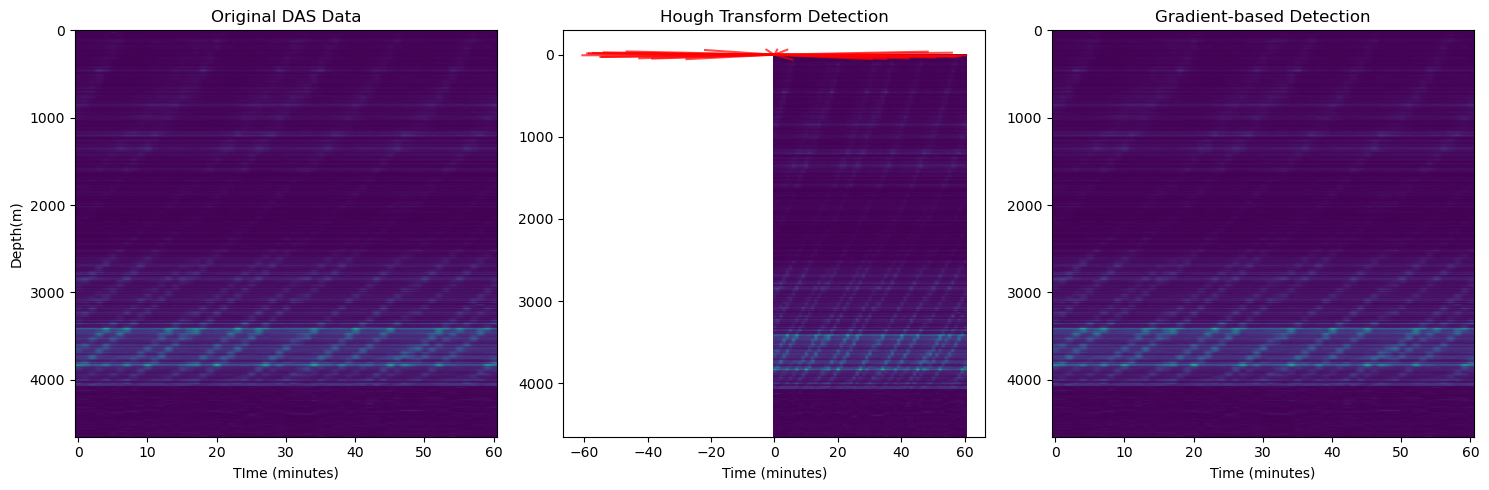

In [55]:
detector.visualise_results(hough_results, gradient_results)

In the implementation of the `DASLineDetector` class, I aimed to create a robust framework for detecting lines in **Distributed Acoustic Sensing (DAS)** data through two primary methods: *Hough Transform detection* and *gradient-based detection*. The goal was to preprocess the data by standardizing it and applying a median filter to reduce noise, thus enhancing the clarity of the detected features. While the initial results showed some promise, the line detection was not as effective as anticipated. For instance, the Hough Transform struggled to accurately identify distinct lines due to the presence of noise and variations in the data, leading to many false positives or undetected lines. Similarly, the gradient-based method failed to capture the subtle features in the dataset, resulting in incomplete or fragmented line segments. Despite these challenges, the exploration of different techniques highlighted areas for improvement, such as optimizing the parameters for edge detection and refining the algorithm for better noise reduction, ultimately guiding the next steps in enhancing the line detection process.

* Describe properties of the lines in case they are detected (algorithmically)

In the `gradient_based_detection` method, the lines are detected by examining the gradients within a sliding window over the preprocessed data. For each detected line segment, the start and end points are defined as the coordinates of the sliding window corners. This is represented by the `tuples ((i, j), (i + window_size, j + window_size))`, where `(i, j)` is the starting point, and `(i + window_size, j + window_size)` is the endpoint. These coordinates indicate the specific depth and time indices where the line segment begins and ends, providing crucial spatial information about the detected feature.

The line length is derived from the start and end points defined in the `gradient_based_detection` method. By calculating the Euclidean distance between these two points, the algorithm can determine how long each detected line segment is. This property is important as it can provide insights into the scale of features present in the data, indicating whether the detected lines are short and localized or long and possibly representing broader phenomena.

Directionality is captured in the same method through the calculation of the average direction of the detected line segments. This is achieved by taking the mean of the directional angles computed with `np.arctan2(temporal_grad, spatial_grad)`. The angle of each detected line provides information on its orientation relative to the axes, which can indicate trends or patterns in the underlying data, such as the slope of geological features or the flow of subsurface materials.

Detection strength is calculated as the average magnitude of gradients along each detected line segment. This is captured in the lines where strength is assigned the mean of the magnitude values computed over the sliding window. A higher strength value suggests a more pronounced feature in the data, indicating that the line is a clear representation of an underlying phenomenon, whereas a lower strength might suggest a weak or noisy feature.

The magnitude of the gradients is computed using the formula `np.sqrt(spatial_grad**2 + temporal_grad**2)` in the `gradient_based_detection` method. This property provides insight into how quickly the signal changes along the detected line. A high gradient magnitude along a line can indicate significant changes in the DAS data, such as abrupt transitions or features that may be of interest for further analysis.

